# ECE 105 Homework 2

**Please turn in a PDF with all your outputs along with your jupyter notebook when you upload your assignment on BBLearn. You can find the details to convert a notebook into a PDF at the bottom of this notebook.**

**This code will take time to run so please understand that it is not possible for the TA's to run all your notebooks. If you face issues converting your notebook, then upload your plot as an image or PDF along with your analysis of the plot in the comment section in BBLearn portal. If you face errors in doing either then make sure to write that in the comment section too so that we know what went wrong. Again, do not turn in your notebook without any description.**

## Multi Armed Bandit (MAB) problem

Let us suppose that you are a rookie gambler who walks into a casino hoping to make some quick buck on a certain day. Since you are rookie the safest thing that you can play is a slot machine since other games like blackjack or poker might me little hard for you. So you go to the slot machine zone and you find $m$ slot machines there. Now, let's assume that the manager told you that each machines has a different probability of winning and you have total $N$ number of pulls that you can use. Remember, the manager didn't specify which machine was fairer and how high was the chance of winning on it than the others. This is for you to find out. 

Also, the manager told you that you can pull each bandit/slot handle a maximum of $k$ times before you start betting in order to find out the probability of winning on machine $i \in [1,..,m]$ . Now you are here to win and take some dough back home. To do that you would have to do the following:


1) Explore:
The explore stage involves pulling each arm a certain number of times, $k$, and using these results to estimate the win probabilities on each arm, yielding an estimate of the arm with the best win probability.


2) Exploit: 
The exploit stage involves pulling the arm estimated to be best for the remaining $N−km$ trials.

The question is how to choose $k$ as a function of $(m, N)$: choosing $k$ too small (not enough exploring) will lead to a higher probability of choosing a sub-optimal arm, while choosing $k$ too large (not enough exploiting) will lead to a sub-optimal win amount. This is in a nutshell the (MAB) problem. 

To be concrete, consider the simplest case with $m = 2$ arms and $n = 20$ pulls. How many pulls $k$ of each arm
are best, on average, so that pulling the estimated best arm the rest of the trials results in the highest average win amount? This is a non-trivial question, and well-suited to investigation by computer simulation. What happens
as the number of trials, $n$, increases? Intuitively, as your “pull budget” increases, you should spend more time
exploring, so as to have a higher confidence in having found the right arm, but it is not clear exactly how much
exploring is appropriate.

In this lab we will explore the (MAB) problem. We will be providing the starter code. For the homework you will be asked to fill out code snippets and analyze the resultant plot that you woud get

## Starter code for MAB

Please read and understand the the fucntions blocks that are provided below before you start working on the assignment.

### pull_arm(p,n): make $n$ pulls on an arm with win prob $p$

In [1]:
"""
pull_arm: make n pulls on an arm with win prob. p
input p: probability of win
input n: number of pulls
return: a np.array of length n
note: 1 represents win and 0 represents loss
"""
def pull_arm(p, n):
    # return random length n list with values {0,1}
    # each entry equals 1 w.p. p or 0 w.p. 1-p
    return np.random.choice([1,0], p=[p, 1-p], size=n)

### create\_MAB(m,n): create a MAB with $m$ arms and pull each arm $n$ times

In [2]:
"""
create_MAB: create a MAB with m arms and pull each arm n times
each of the m arms has a win probability pe chosen uniformly
at random over the interval [0,1]
input m: number of arms
input n: number of pulls
return p: list of m arm win probabilities
return M: np.array of dimension m times n of arm pulls
note: every element of M is 1 (win) or 0 (loss)
note: M[a,i] the outcome of pull i (out of n) of arm a (out of m)
"""
def create_MAB(m, n):
    p = np.random.uniform(0, 1, m)
    M = np.array([pull_arm(pe, n) for pe in p])
    return p, M

### play\_MAB(m,n,t): play MAB with $m$ arms using $n$ pulls with $t$ max explore pulls per arm 

In [3]:
"""
play_MAB: play MAB with m arms using n pulls with t max explore pulls per arm
input m: number of arms
input n: number of pulls
input t: max # explore pulls
return: ratio of wealth earned over wealth pulling best arm
"""
def play_MAB(m, n, t):
    # call create_MAB to obtain the win probabilities p and the outcomes M
    p, M = create_MAB(m, n)
    # call explore_MAB to determine the number of trials per arm, k
    k = explore_MAB(m, n, t)
    """
    access the specific entries of each row a of the outcomes M for each arm
    for arm a = 0,...,m-1 we access k entries
    starting with index a * k, and ending with index (a+1)*k-1
    then, sum these entries up to get the number of wins from each arm a
    so, w_est is a list of length m, holding # wins on each arm out of k pulls
    """
    w_est = [np.sum(M[a, a*k : (a+1)*k]) for a in range(m)]
    """
    a_est is the best guess for the best arm, based upon the results in w_est
    use the np.where command to obtain the indices in w_est holding the max
    it is possible for there to be multiple maxima, we break ties by choosing
    the maximum with the lowest index
    """
    a_est = np.where(np.array(w_est) == max(w_est))[0][0]
    """
    having tested each of the arms, and guessed the best arm, now use the rest
    of the trials to pull that arm.  As we have used m * k trials exploring,
    we start at trial index m *k and go through the end, i.e., to n-1
    add the sum of wins from these trials to the list w_est using append
    """
    w_est.append(np.sum(M[a_est, m*k : n]))
    """
    now, use np.where to identify the arm with the actual best win probability
    from the list of win probabilities p (break ties by choosing lowest index)
    """
    a_best = np.where(np.array(p) == max(p))[0][0]
    """
    now, suppose you knew the value of p in advance, and then pulled that arm
    for all n trials, yielding the best possible win w_best
    """
    w_best = M[a_best,:]
    """
    it is possible that w_best sums to zero, e.g., if all values of p are
    very small.  In this case, we report a value of -1, and will interpret it
    as a failed trial.  Otherwise, sum up w_est and w_best and return their
    fraction, which represents the fraction of the maximum possible wealth
    obtained without foreknowledge of p
    """
    return np.sum(w_est)/np.sum(w_best) if np.sum(w_best) > 0 else -1


### play\_MAB\_ave(m,n,t): call play\_MAB(m,n,t) N times and average results 

In [4]:
"""
play_MAB_ave: call play_MAB(m,n,t) N times and average results
input m: number of arms
input n: number of pulls
input t: max # explore pulls
input N: number of independent trials
return average over valid trials
"""
def play_MAB_ave(m, n, t, N):
    # call play_MAB N times and store results in res
    res = [play_MAB(m, n, t) for _ in range(N)]
    """
    as explained in play_MAB comments, not all trials are successful
    unsuccessful trial return a value of -1, while successful trials
    return a value between 0 and 1, the fraction of wealth obtained over
    the maximum possible wealth obtainable
    res_cal sums the outcomes of trials with r >= 0
    res_cnt counts the number of trials with r >= 0
    """
    res_val = sum([r for r in res if r >= 0])
    res_cnt = sum([1 for r in res if r >= 0])
    # return the average value of the successful trials
    return res_val / res_cnt

### explore\_MAB(m,n,t): compute \# of trial pulls $k \leq t$ of each arm given $n$ pulls 

In [5]:
"""
explore_MAB: compute # of trial pulls k <= t of each arm given n pulls
input m: number of arms
input n: number of pulls
input t: max # explore pulls
return: # of explore pulls of each arm
note: n/m is the number of trials per arm if we spend equal effort on each arm
if n/m < t then it is not possible to pull each arm t times
if n/m < t then pull each arm int(1.*n/m) times
else, if n/m > t, then we *can* afford to pull each arm t times
and will have n - t * m pulls left over for pulling the estimated best arm
"""
def explore_MAB(m, n, t):
    return int(1.*n/m) if n/m < t else t


## For the homework you have to complete the following function block and run the whole code for an input instance of your choice

### plot\_MAB(m, N, n\_set, t\_set, f\_set, filename): plot the results

In [6]:
"""
plot_MAB
input m: number of arms
input N: number of trials
input n_set: set of # of pulls
input t_set: set of max # explore pulls
input f_set: average fraction of max wealth achieved
plot the results and save the file
"""

"""
    plot the results for each value t in t_set
    x-axis is the number of trials, given by n_set
    y-axis is the average fraction of wealth obtained
    use zip to allow labels for each value of t in t_set
    """
#define your function below with function name provided above

import matplotlib.pyplot as plt
import numpy as np

def plot_MAB(m, N, n_set, t_set, f_set, filename):
    
    plt.subplot(1,1,1)
    plt.title('Number of Trials against Average Fraction of Wealth Obtained')
    plt.xlabel('Number of Pulls')
    plt.ylabel('Average Fraction of Wealth Obtained')
    for t in t_set:
        my_list= []
        for n in n_set:
            my_list.append(play_MAB_ave(m,n,t,N))
        f_set.append(my_list)
    [plt.plot(n_set, f, label='Explore Pulls={}'.format(t)) for f, t in zip(f_set, t_set)]
    plt.legend(loc='upper center', bbox_to_anchor=(1.2,0.8))
    plt.savefig(filename)
    


### Calling the above functions to make the plot

Choose the parameters of your choice. For example you might want to choose $m=2$ for starter and then check for higher values. Please note that as you increase the parameter values your running time will increase so don't panic if your code takes considerable amount of time to run.

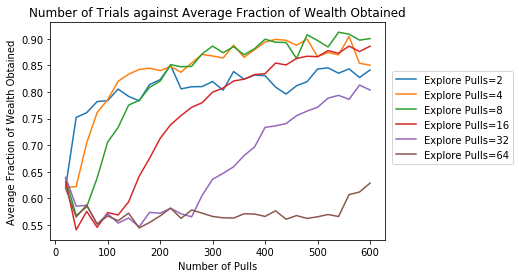

In [7]:
# define m: number of arms

# define N: number of trials

# define n_set: set of # of pulls (20, 40, 60, ..., 580, 600)

# define t_set: set of max # explore pulls

# define f_set: average fraction of max wealth achieved

# assign a filename

# plot the results
m=8
N=100
n_set=[]
[n_set.append(i) for i in range(20,601,20)]
t_set=[2, 4, 8, 16, 32, 64]
f_set=[]
filename="results.pdf"
plot_MAB(m, N, n_set, t_set, f_set, filename)


### Analyze and comment below on the plot that you got  

You don't have to be too descriptive about the analysis. A simple intutive explanation would also work as long it is clear to us that you understood what you were doing

From the plot, we can see that to achieve the highest probability of acquiring the maximum amount of wealth, the first four to eight pulls need to be used for exploration to determine the best arm. After this, the rest of the pulls are to be used on this best arm. For this graph, the total number of pulls are six hundred.

### How to save a .ipynb file as a pdf 

Please note that you might face issues if you directly try to convert this notebook to pdf by using the "download as" option from the dropdown menu under File above. You may skip the steps below if you already know how to convert it into pdf. If you don't then do the following:

1) run the command "conda install nbconvert" or "pip install nbconvert" from your terminal depending on whether you are using anaconda to run python or not. If you are using anaconda then run the former command otherwise latter.

2) Once you have succesfully installed the nbconvert module, go to the directory from your terminal where you notebook is saved and run the command "jupyter nbconvert name_of_your_notebook.ipynb --to pdf". This command will convert your .ipynb file to a pdf

Please reach out to us if you face any issues.